# Relatório de Modelagem e Simulação - Grupo Enzo

**Membros**:
- Ísis Ardisson Logullo
- João Pedro Lukasavicus Silva
- Leonardo Martinez Ikeda
- Matheus Conceição
- Vitor Barbosa Sério

## 1 Introdução

### 1.1 Bloco em rampa

#### 1.1.1 Forças atuantes

Como o carrinho utilizado é leve, podemos dizer que a massa do corpo do carrinho, junto com o celular, possui massa muito maior que suas rodas. Portanto, podemos aproximar esse problema para um caso de bloco deslizando sem atrito. Porém, ainda existe a força de resistência do ar atuando.

$\overrightarrow{F}_r(t) = \overrightarrow{F}_g + \overrightarrow{F}_N + \overrightarrow{F}_d(v(t))$

onde $v(t)$ é a velocidade do objeto no instante $t$, $F_r$ é a força resultante, $F_g$ é força gravitacional, $F_N$ é a força normal, $F_d$ é a força de resistência do ar e $\theta$ é o ângulo de inclinação da rampa.

Sabemos que

$F_g = mg$

onde $m$ é a massa do objeto e $g$ é a aceleração da gravidade ($\approx \text{9,8m/s}^2$).

Além disso,

$\overrightarrow{F}_N = - \overrightarrow{F}_{g,x}$ e $\overrightarrow{F}_d \propto - \overrightarrow{F}_{g,y}$

onde $\overrightarrow{F}_{g,x}$ e $\overrightarrow{F}_{g,y}$ são as componentes perpendicular e paralela ao plano da rampa de $F_g$, respectivamente. Ou seja,

$F_{g,x} = F_g \text{cos}(\theta)$ e $F_{g,y} = F_g \text{sen}(\theta)$

então,

$F_r(t) = F_g \text{sen}(\theta) - F_d(v(t))$

Como o ar possui viscosidade muito baixa e a velocidade do objeto é, em média, alta (em comparação com a viscosidade do ar), temos que

$F_d(v(t)) \approx C v^2(t)$

onde $C$ é um coeficiente que pode ser calculado por

$C = \text{0,2} \rho_{ar} A$

com $\rho_{ar}$ sendo a densidade do ar ($\approx \text{1,2kg/m}^3$) e $A$, a área frontal do objeto.

Logo,

$F_r(t) = mg\text{sen}(\theta) - C v^2(t) \Rightarrow a(t) = \cfrac{dv}{dt} = g\text{sen}(\theta) - \cfrac{C v^2(t)}{m}$

Com isso, podemos perceber que esse caso é semelhante a um de queda livre com resistência do ar, mas em que $g$ vale $g\text{sen}(\theta)$. Portanto,

$v(t) = \sqrt{\cfrac{2 m g\text{sen}(\theta)}{C}}\text{tgh}\left(\cfrac{g\text{sen}(\theta)C}{2 m}t\right)$

#### 1.1.2 Parâmetros iniciais

$m$, $g$, $\rho_{ar}$, $A$ e $\theta$ são constantes

$v(0) = 0\text{m/s}$

$a(0) = g \text{sen}(\theta)$

### 1.2 Movimento Circular Uniforme

#### 1.2.1 Forças atuantes

$F_r = F_c = m \omega^2 R$

onde $F_r$ é a força resultante, $F_c$ é a força centrípeta, $m$ é a massa do objeto, $\omega$ é a velocidade angular do objeto e $R$ é o raio da trajetória.

$\theta(t) = \theta_0 + \omega t$

$\theta(t) = \theta_0 + \cfrac{d \theta}{dt} t$

#### 1.2.2 Parâmetros iniciais

$m$, $R$ e $\omega$ são constantes

$\theta(0) = \theta_0$

### 1.3 Pêndulo

#### 1.3.1 Forças atuantes

$\overrightarrow{F}_r(t) = \overrightarrow{F}_g + \overrightarrow{F}_T(t) + \overrightarrow{F}_d(v(t))$

onde $F_r$ é a força resultante, $F_g$ é a força gravitacional, $F_T$ é a tensão na corda, $F_d$ é a resistência do ar e $v(t)$ é a velocidade linear do objeto no instante $t$.

Para simplificar os cálculos, vamos considerar apenas as componentes que alteram a magnitude da velocidade do objeto, que são as compoentes tangentes à tragetória do mesmo (os outros componentes alterama direção). Então, podemos simplificar a expressão acima como

$F^*_r(t) = F_g \text{sen}(\theta(t)) - F_d(v(t))$

Novamente, podemos dizer que $F_d(v(t)) \approx C v^2(t)$, então,

$F^*_r(t) = m g \text{sen}(\theta(t)) - C v^2(t)$

Como a tragetória é um arco de raio $L$ (o comprimento da corda), podemos dizer que

$v(t) = \omega(t) L = \cfrac{d\theta}{dt} L$ e $a(t) = \alpha(t) L = \cfrac{d^2\theta}{dt^2} L$

onde $\omega(t)$ e $\alpha(t)$ são a velocidade e aceleração angulares do objeto no instante $t$, respectivamente.

Portanto,

$a(t) = g \text{sen}(\theta(t)) - \cfrac{C v^2(t)}{m}$

$\alpha(t) = \cfrac{g \text{sen}(\theta(t))}{L} - \cfrac{C L \omega^2(t)}{m}$

$\cfrac{d^2 \theta}{dt^2} = \cfrac{g}{L} \text{sen}(\theta(t)) - \cfrac{C L}{m} \left(\cfrac{d\theta}{dt}\right)^2$

#### 1.3.2 Parâmetros iniciais

$m$, $g$, $\rho_{ar}$, $A$ e $L$ são constantes

$\theta(0) = \theta_0$

$\omega(0) = 0\text{rad/s}$

$\alpha(0) = \cfrac{g\text{sen}(\theta_0)}{L}$

#### 1.4 Vídeo e inicialização do programa

Abaixo um link para o vídeo do experimento realizado.

INSERIR LINK AQUI

Agora, para iniciar o programa, vamos primeiro importar as bibliotecas que serão utilizadas e já declarar as funções auxiliares.

In [1]:
##################################
#          BIBLIOTECAS           #
##################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display
import math

pd.options.mode.chained_assignment = None

##################################
#           FUNCOES              #
##################################

    
def integrate(x, y, y0 = 0):
    '''
    array, array, object -> array
    
    Recebe dois vetores com dados e retorna um vetor de mesmo tamanho, que seria o resultado da integral de y em x.
    y0 é o valor inicial da integral.
    '''
    yi = [y0]
    
    for i in range(1, min(len(x), len(y))):
        dy = ((y[i-1] + y[i]) / 2) * (x[i] - x[i-1])
        yi.append(yi[i-1] + dy)
        
    return yi

def derivate(x, y, y0 = 0):
    '''
    array, array, object -> array
    
    Recebe dois vetores com dados e retorna um vetor de mesmo tamanho, que seria o resultado da derivada de y em x.
    y0 é o valor inicial da derivada.
    '''
    yi = [y0]
    
    for i in range(1, min(len(x), len(y))):
        dy = y[i] - y[i-1]
        dx = x[i] - x[i-1]
        if dx == 0:
            yi.append(dy)
        else:
            yi.append(dy / dx)
        
    return yi

## 2 Método


## 3 Dados

### 3.1 Armazenamento dos dados

Para todos os experimentos, serão utilizados os valores constantes $g = \text{9,8m/s}^2$ e $\rho_{ar} = \text{1,2kg/m}^3$ como aceleração da gravidade e densidade do ar, respectivamente.

Quanto aos outros valores, vamos fazer a leitura e armazenamento dos dados experimentais, que estão explicitados nos itens a seguir.

#### 3.1.1 Bloco em rampa

$\theta_r = 6^\circ$ (inclinação da rampa)

$D = \text{3,64m}$ (distância total percorrida na rampa)

$m_r = \text{0,34kg}$ (massa do bloco)

$A_r = \text{0,008m}^2$ (área frontal do bloco)

A aceleração, $a_r$, foi obtida através de medidas do acelerômetro do celular e os dados foram amazenados em uma tabela *csv*.

#### 3.1.2 Movimento Circular Uniforme

$R = \text{2,1m}$ (raio da trajetória)

O tempo das voltas, $t$, foi obtido manualmente com um cronômetro e armazenado em uma tabela *csv*.

#### 3.1.3 Movimento Pendular

$l = \text{0,823m}$ (comprimento de cada uma das 4 cordas)

$a = \text{0,051m}$ (largura do cesto)

$b = \text{0,144m}$ (comprimento do cesto)

$L = \sqrt{l^2 - \left(\cfrac{a}{2}\right)^2 - \left(\cfrac{b}{2}\right)^2} \approx \text{0,819m} $ (comprimento da "corda imaginária" do pêndulo)

$m_p = \text{0,2kg}$ (massa do pêndulo)

$A_p = \text{0,0059m}^2$ (área frontal do pêndulo)

A velocidade angular, $\omega_p$, foi obtida através de medidas do giroscópio do celular e os dados foram armazenados em uma tabela *csv*.

In [2]:
##################################
#            DADOS               #
##################################
#
#
## 00000 = dados faltando
## 'CHUTE' = valores que esquecemos (Vitor, principalmente) de coletar, então estão estimados e podem precisar de ajustes
#
#
## A plotagem dos gráficos não é definitiva e está aí mais pra visualizarmos e fazermos testes

############ Constantes ###########

g = 9.8                 # aceleração da gravidade (m/s^2)
par = 1.2               # densidade do ar         (kg/m^3)

########## Bloco em rampa #########
thetar = 6 * math.pi / 180  # inclinacao              (rad)
D = 3.64                    # distância percorrida    (m)
mr = 0.34                   # massa do bloco          (g)
Ar = 0.008                  # área frontal do bloco   (m^2)
r = []                      # lista para armazenar os dados do acelerometro

for i in range(5):
    # lendo dados do acelerometro
    r.append(pd.read_csv('r' + str(i+1) + '.csv'))
    

############### MCU ###############
R = 2.1                     # raio (m)
t = pd.read_csv('mcu.csv')  # tabela com os dados dos tempos das voltas
c = []                      # lista para armazenar os tempos medidos pra cada experimento

for i in range(5):
    c.append(t.loc[t['rep'] == i+1])
    c[i] = c[i].reset_index()
    c[i] = c[i].filter(items=['time', 'theta'])

############# Pêndulo #############
l = 0.823                               # comprimento das cordas                     (m)
a = 0.051                               # largura do cesto                           (m)
b = 0.144                               # comprimento do cesto                       (m)
L = math.sqrt(l**2 - (a/2)**2 - (b/2)**2)  # comprimento da corda imaginária do pêndulo (m)
mp = 0.2                                # massa do pendulo                           (kg) - CHUTE!!
Ap = 0.0059                             # área frontal do pêndulo                    (m^2)
p = []                                  # lista para armazenar os dados do giroscópio
theta0 = []                             # inclinação inicial

for i in range(5):
    # lendo dados do giroscópio
    p.append(pd.read_csv('p' + str(i+1) + '.csv'))

### 3.2 Lipeza dos dados

Agora, vamos precisar adaptar esses dados para a análise que será feita. Como os dados de cada experimento são bastante diferentes, o processo de "limpeza" também o é. Esses processos serão explicados nas sessões seguintes.

#### 3.2.1 Bloco em rampa

Primeiro, é preciso remover os valores de variáveis que não serão úteis para este trabalho. Neste caso, os únicos valores interessantes são os de tempo e os da aceleração linear no eixo $x$. Todos os outros valores podem ser removidos.

Após isso, é necessário remover os valores iniciais do acelerômetro, que correspondem ao intervalo de alguns segundos dado antes de se iniciar o experimento de fato e o bloco estava imóvel no topo da rampa. Esses tempos iniciais foram estimados visualmente para cada um dos 5 experimentos, conforme o gráfico abaixo



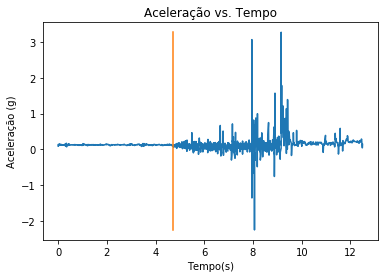

In [3]:
plt.plot(r[0]['time'], r[0]['gFx'])
plt.plot([4.7, 4.7], [min(r[0]['gFx']), max(r[0]['gFx'])], color = 'C1')
plt.title('Aceleração vs. Tempo')
plt.xlabel('Tempo(s)')
plt.ylabel('Aceleração (g)')
plt.show()

Isso foi repetido para cada um dos 5 experimentos, obtendo os tempos iniciais de 4,7s, 2,9s, 6,2s, 4,6s e 4,5s.

Além disso, também é preciso arrumar os valores da aceleração medidos, pois os mesmos são dados pelo acelerômetro como proporcões da aceleração gravitacional. Para fazer essa conversão, basta muliplicar todos os valores por $g$.

Com isso, podemos agora estimar valores experimentais para a velocidade e o deslocamento ao longo do tempo "integrando" os valores do acelerômetro pela Regra dos Trapésios, para obter a velocidade experimental e integrando novamente para obter o deslocamento experimental.

Agora, além do tempo inicial que já foi descartado, há também um tempo final que não interessa. Como temos o deslocamento experimental e sabemos que a rampa possui 3,64m de comprimento, todos os valores com deslocamento maior que esse comprimento foram descartados.

Finalmente, podemos visualizar os resultados de cada experimento nos gráficos abaixo.

#### 3.2.2 Movimento Circular Uniforme

Para o movimento circular, os tempos obtidos foram referentes a cada uma das voltas. Porém como cada um dos 5 experimentos consistiu em três voltas consecutivas, é mais interessante que os tempos sejam somados de forma a se obter os tempos totais de cada experimento. Além disso, o deslocamento angular está dado como 1 e 2, onde 1 se refere a meia-volta e 2 a uma volta completa. Esses valores também precisam ser convertidos para $\pi, 2\pi, \dots, 6\pi$, que seriam os valores do deslocamento angular.

Finalmente, podemos calcular a velocidade angular média ao longo de cada experimento "derivando" o deslocamento angular no tempo.

#### 3.2.3 Movimento Pendular

De forma semelhante ao explicado na parte 3.2.1, os valores nos eixos $y$ e $z$ e o valor total não são necessários e podem ser removidos. Além disso, os dados iniciais também precisam ser removidos e os tempos iniciais foram determinados visualmente, como no gráfico abaixo.

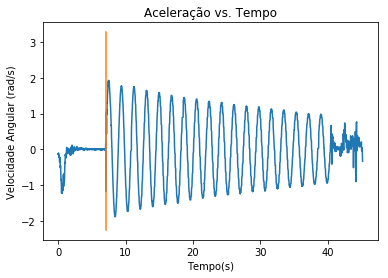

In [4]:
plt.plot(p[0]['time'], p[0]['wx'])
plt.plot([7.05, 7.05], [min(r[0]['gFx']), max(r[0]['gFx'])], color = 'C1')
plt.title('Aceleração vs. Tempo')
plt.xlabel('Tempo(s)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.show()

Agora, como limite superior, foi determinado um valor arbitrário de forma que cada experimento tivesse uma duração de 30s.

Após isso, pode-se calcular a inclinação experimental no tempo intergrando os valores da velocidade angular. Porém, como a inclinação inicial é desconhecida, faz-se a integração dos pontos com $\theta_0 = 0$. Então, podemos estimar a inclinação inicial real como sendo $\theta_0 = \theta_\text{max} / 2$. Esse novo valor de $\theta_0$ é então utilizado para recalcular a inclinação ao longo do tempo.

Além da inclinação ao longo do tempo é também necessário calcular a aceleração angular. Isso pode ser feito derivando os valores da velocidade angular, fazendo $\alpha = \Delta \omega / \Delta t$ entre cada ponto consecutivo. Além disso, tempos que $\alpha_0 = g\text{sen}(\theta_0)/L$.

### 3.3 Gráficos experimentais

Abaixo, temos o código que executa toda a limpeza dos dados e imprime os gráficos resultantes dessa limpeza, com os valores experimentais obtidos.

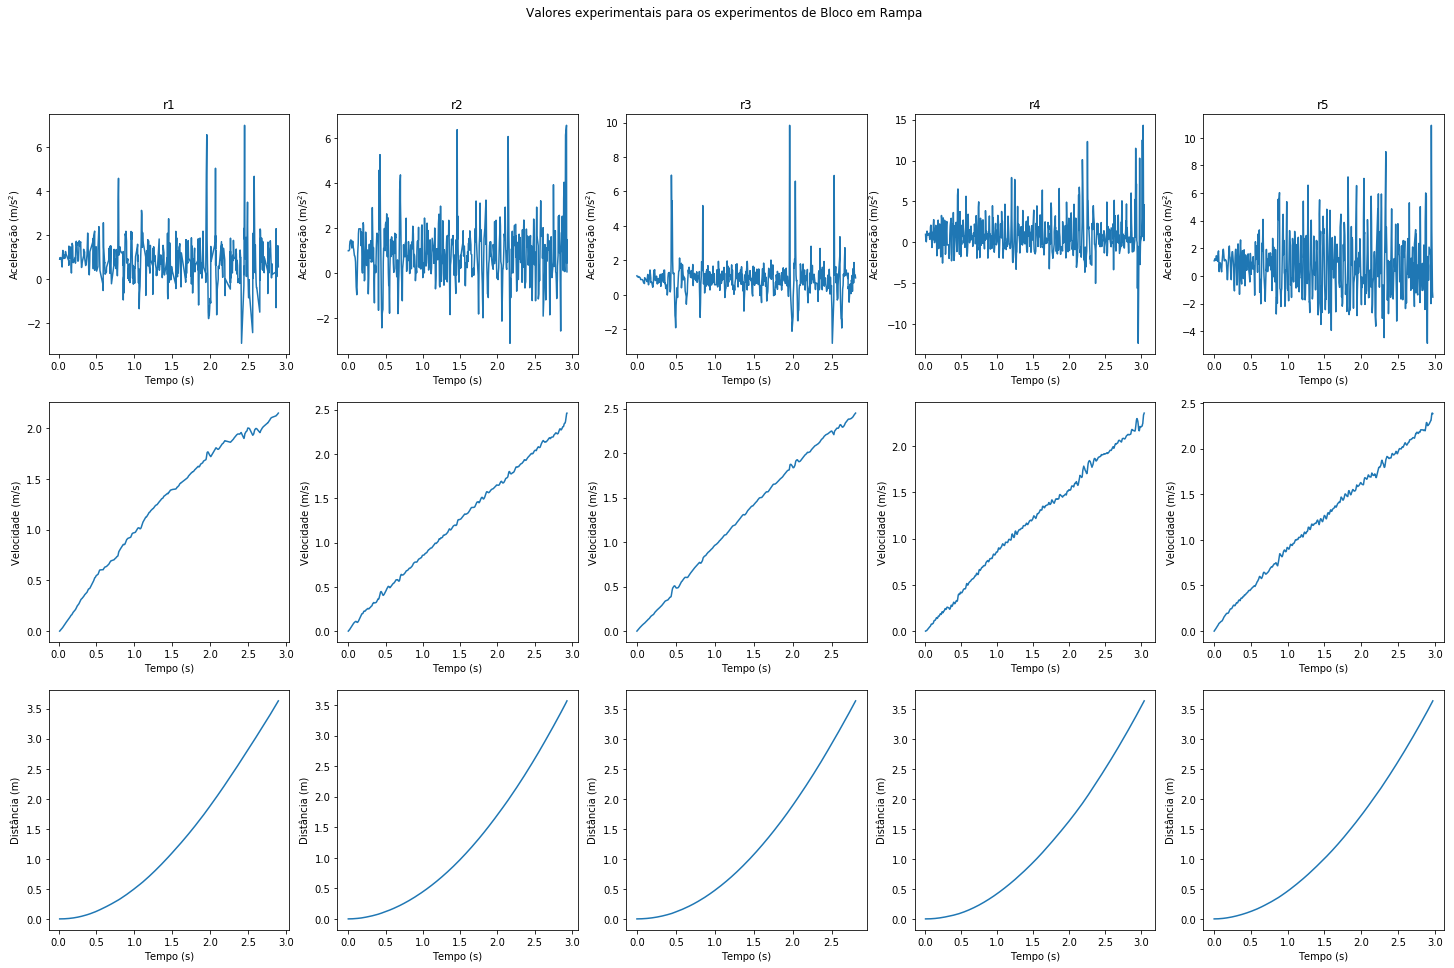

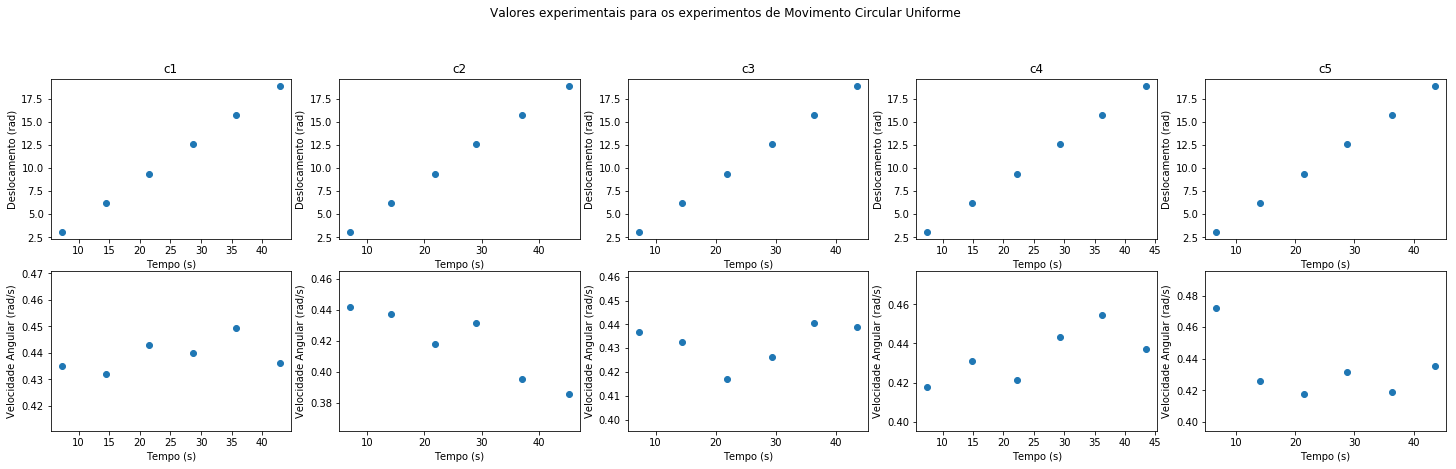

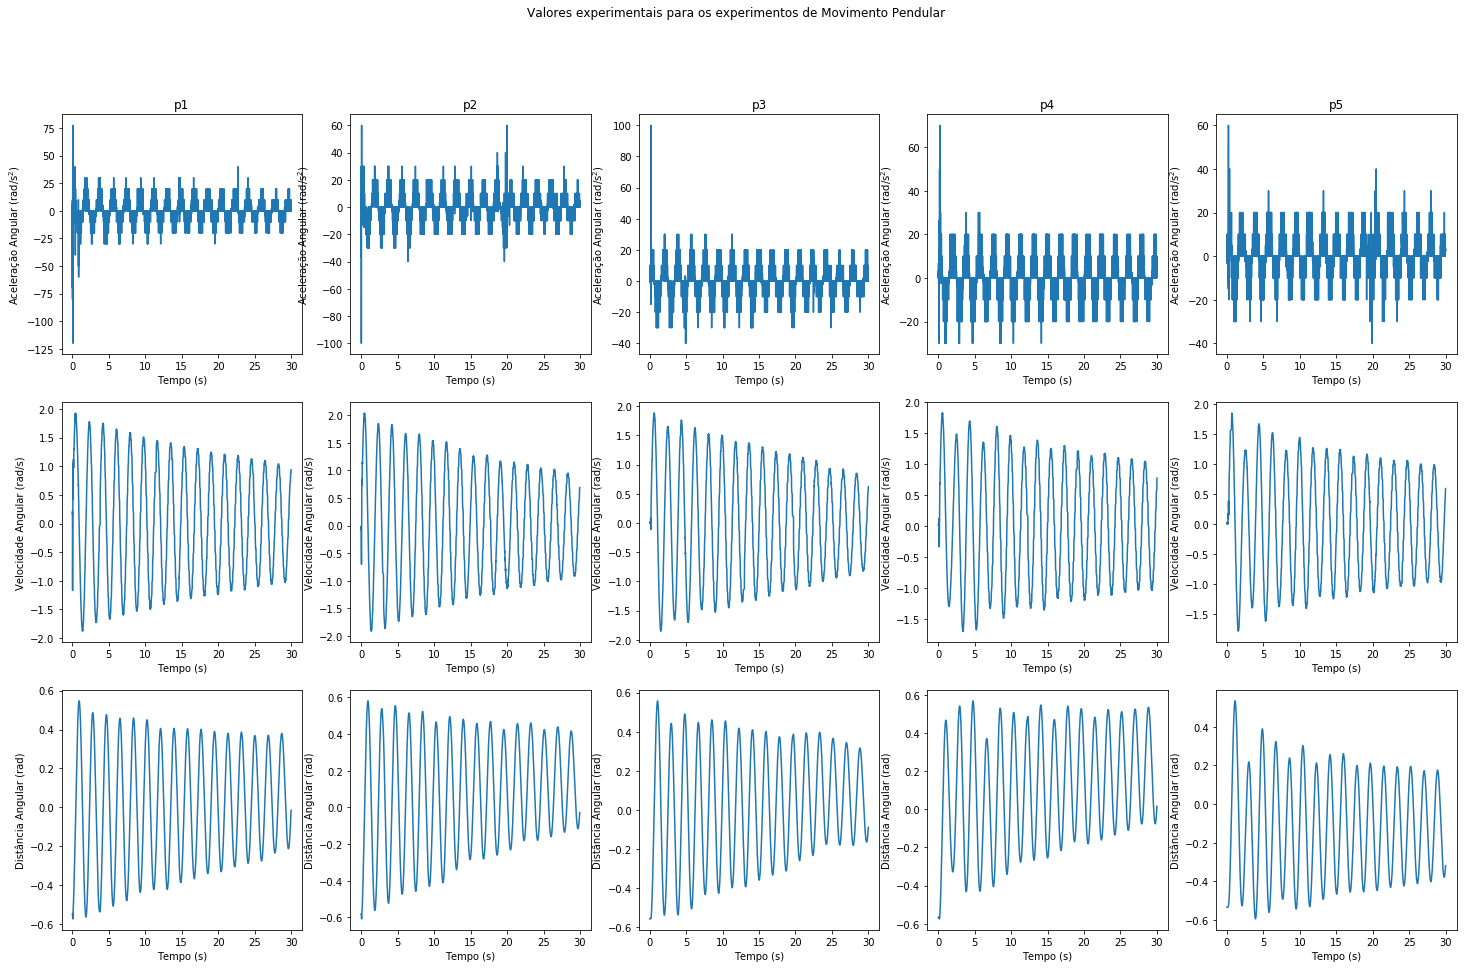

In [5]:
##################################
#       LIMPEZA DOS DADOS        #
##################################
    
########## Bloco em rampa #########
    
tmin_r = [4.7, 2.9, 6.2, 4.6, 4.5]  # tempos iniciais estimados (s)

for i in range(5):
    # removendo variáveis que não serão utilizadas        
    r[i] = r[i].filter(items=['time', 'gFx']) 
    # removendo dados antes do tempo inicial estimado              
    r[i] = r[i].loc[r[i]['time'] >= tmin_r[i]]
    r[i] = r[i].reset_index()
    # convertendo valores para m/s^2
    r[i].update(pd.Series(r[i]['gFx'] * g, name = 'gFx'))  
    # 'zerando' o tempo
    r[i].update(pd.Series(r[i]['time'] - tmin_r[i], name = 'time'))
    # calculando as velocidades experimentais
    r[i]['v'] = integrate(r[i]['time'], r[i]['gFx'])
    # calculando o deslocamento experimental
    r[i]['d'] = integrate(r[i]['time'], r[i]['v'])
    # filtrando dados com deslocamento maior que o tamanho total da rampa
    r[i] = r[i].loc[r[i]['d'] <= D]
    
############### MCU ###############

for i in range(5):
    c[i]['theta'][0] = 1*math.pi
    c[i]['theta'][1] = 2*math.pi
    for j in [2, 4]:
        c[i]['theta'][j] = (j+1)*math.pi
        c[i]['theta'][j+1] = (j+2)*math.pi
        c[i]['time'][j] += c[i]['time'][j-1]
        c[i]['time'][j+1] += c[i]['time'][j-1]
    c[i]['w'] = derivate(c[i]['time'], c[i]['theta'], y0 = c[i]['theta'][0] / c[i]['time'][0])
    
############# Pêndulo #############
    
tmin_p = [7.05, 5.15, 5.2, 5.15, 5.3]   # tempos iniciais estimados (s)

for i in range(5):
    # removendo variáveis que não serão utilizadas
    p[i] = p[i].filter(items=['time', 'wx'])
    # removendo dados fora do intervalo alvo
    p[i] = p[i].loc[(p[i]['time'] >= tmin_p[i]) & (p[i]['time'] <= tmin_p[i] + 30)]
    p[i] = p[i].reset_index()
    # 'zerando' o tempo
    p[i].update(pd.Series(p[i]['time'] - tmin_p[i], name = 'time'))
    # calculando a inclinação experimental
    p[i]['theta'] = integrate(p[i]['time'], p[i]['wx'])
    # estimando a inclinação inicial
    theta0.append(max(p[i]['theta']) / 2)
    # recalculando a inclinação experimental
    p[i].update(pd.Series(integrate(p[i]['time'], p[i]['wx'], y0 = -theta0[i]), name = 'theta'))
    # calculando a aceleração angular
    p[i]['a'] = derivate(p[i]['time'], p[i]['wx'], y0 = g * math.sin(theta0[i]) / L)

##################################
#     GRAFICOS EXPERIMENTAIS     #
##################################
    
########## Bloco em rampa #########

plt.figure(figsize = (25, 15), facecolor = '#FFFFFF')
plt.suptitle('Valores experimentais para os experimentos de Bloco em Rampa')
for i in range(5):
    plt.subplot(3, 5, i+1)
    plt.plot(r[i]['time'], r[i]['gFx'])
    plt.xlabel('Tempo (s)')
    plt.ylabel(r'Aceleração (m/s$^2$)')
    plt.title('r' + str(i+1))
    
    plt.subplot(3, 5, i+6)
    plt.plot(r[i]['time'], r[i]['v'])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Velocidade (m/s)')
    
    plt.subplot(3, 5, i+11)
    plt.plot(r[i]['time'], r[i]['d'])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Distância (m)')
plt.show()

############### MCU ###############

plt.figure(figsize = (25, 10), facecolor = '#FFFFFF')
plt.suptitle('Valores experimentais para os experimentos de Movimento Circular Uniforme')
for i in range(5):
    plt.subplot(3, 5, i+1)
    plt.scatter(c[i]['time'], c[i]['theta'])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Deslocamento (rad)')
    plt.title('c' + str(i+1))
    
    plt.subplot(3, 5, i+6)
    plt.scatter(c[i]['time'], c[i]['w'])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Velocidade Angular (rad/s)')
plt.show()

############# Pêndulo #############

plt.figure(figsize = (25, 15), facecolor = '#FFFFFF')
plt.suptitle('Valores experimentais para os experimentos de Movimento Pendular')
for i in range(5):
    plt.subplot(3, 5, i+1)
    plt.plot(p[i]['time'], p[i]['a'])
    plt.xlabel('Tempo (s)')
    plt.ylabel(r'Aceleração Angular (rad/s$^2$)')
    plt.title('p' + str(i+1))
    
    plt.subplot(3, 5, i+6)
    plt.plot(p[i]['time'], p[i]['wx'])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Velocidade Angular (rad/s)')
    
    plt.subplot(3, 5, i+11)
    plt.plot(p[i]['time'], p[i]['theta'])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Distância Angular (rad)')
plt.show()
    


### 3.4 Modelo teórico

#### 3.4.1 Bloco em rampa


#### 3.4.2 Movimento Circular Uniforme


#### 3.4.3 Movimento Pendular

**Animações**


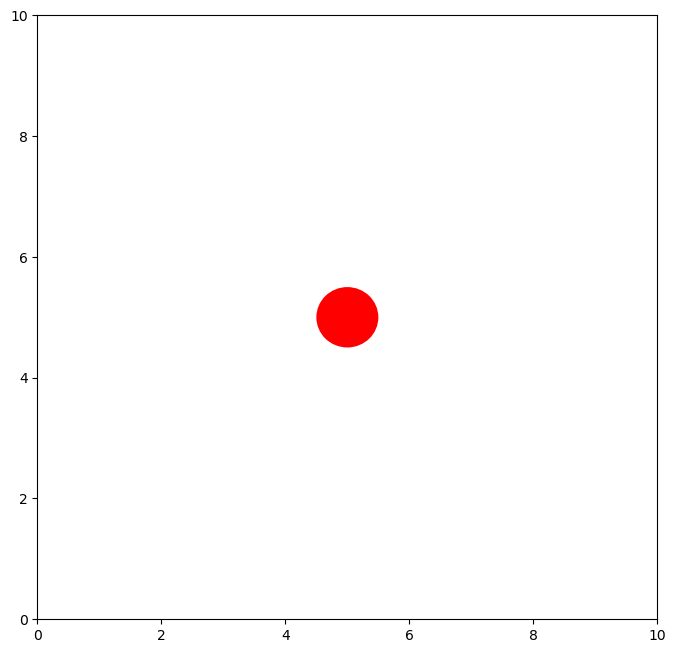

In [6]:
#cria objeto figura e inicializa o canvas para a animação
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(8, 8)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, 5), 0.50, fc='r')



#funções animate e init requeridas pela função FuncAnimation
def animate(i):
    '''
    essa função é chamada pela função FuncAnimation
    a cada iteração ela plota com um i diferente
    
    i: ângulo do circulo em relação ao eixo x    
    '''
    x, y = patch.center
    x = 5 + 2 * np.sin(np.radians(i))
    y = 5 + 2 * np.cos(np.radians(i))
    patch.center = (x, y)
    return patch,

def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

#plotando a animação

anim = FuncAnimation(fig, animate, init_func=init, frames=360, 
                               interval=20, blit=True)

plt.show()

## 4 Interpretação



## 5 Crítica



## 6 Registro

- Realização do experimento
- Anotação dos dados
- Gravação do vídeo
- Edição do video e upload no youtube
- Criação do código de plotagem e analise dos dados e dos erros
- Criação dos gráficos
- Estruturação e redação do relatório